# Lab 2 : EM Algorithm, DB Scan, and Kmeans

---




---



General Instructions:

---



1. You have to do this lab individually
2. You may use **seaborn, matplotlib, pandas, numpy, csv**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). You can also run it in your local anaconda jupyter notebook.
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **observations** (preferably in a text block) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. You can use any programming language of your choice. In case you prefer any other language than python then you can submit all the code and related files along with detailed pdf report in a zip format on the classroom. In such cases  suitable input format for each of the question and a readme file should precisely tell how to compile and run your program. Give the exact commands with respect to the datasets provided. 
11. The deadline is strict and any assignment submitted later will not
be consider for evaluation unless you take prior permission (at least 4 days before the submission deadline).
12. The marks will be given on the basis of quality of code, use of innovative data structures, scalability, correctness, and completeness of the reported observation.
13. In case of any queries regarding Lab 2, please mail the TAs (emails are provided on the google classroom).

**Best Wishes**


#1. Adult Dataset

###About the Dataset
The data set contains information of 32562 individuals from the 1994
census, of which 21790 are males and 10771 are females. We choose six attributes as feature set: age, fnlwgt, education_num, capital_gain, hours_per_week, sex. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/adult) 



#2. Spiral Dataset

###About the Dataset
The dataset is synthetically generated contains 5000 datapoints. Each datapoint contains a feature vector of size three denoting x,y coordinate in 2D plane and the last feature denoting the binary class. 



---

**NOTE**: Please use the provided dataset files along with this notebook. The adult dataset is scaled and normalised version of complete dataset available at UCI repository. 

---

In [ ]:
# Perform the necessary imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import csv
import sys
import time

In [ ]:
# To access files stored in Google Drive, following block import is used
# If using on a local system, please comment the lines below in this code block
from google.colab import drive
drive.mount('/content/MyDrive', force_remount = True)

Mounted at /content/MyDrive


**TASK 1**:                                                      **(5 Marks)**

1. Download and load the dataset files into pandas dataframe. You can refer to the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/io.html). (**1 point**) 
2. Report the total number of samples and the total number of columns in the dataset. (**1 point**)
3. Evaluate the dataset and drop data which hash 'NA' values. Now report the total number of samples and the total number of columns in the dataset. (**1 point**)
4. Plot a bar chart showing the number of samples present for different class. In Adult dataset consider 'sex' to be class labels and in Spiral dataset consider the last binary feature to be class label. (**1 point**)
5. Plot the spiral dataset using matplotlib to check if the datset is spiral or not. Use only first two columns denoting x,y coordinates in 2D plane. (**1 point**)

In [ ]:
# Load the data from csv file into a data frame (1 point)
# Please insert your code here
df_spiral = pd.read_csv("/content/MyDrive/MyDrive/data mining/AADITYA RAJ BARNWAL - spiral.csv")
df_adult = pd.read_csv("/content/MyDrive/MyDrive/data mining/AADITYA RAJ BARNWAL - adult.csv")

In [ ]:
df_spiral

,x,y,class
0,4.41933,-4.364950,0
1,-1.77464,-6.363290,0
2,-7.87681,-5.552910,0
3,-7.67895,-0.044552,0
4,-8.78107,-3.442720,0
...,...,...,...
4995,5.84197,-1.213820,1
4996,2.46677,0.242835,1
4997,-3.58882,0.462759,1
4998,-5.82406,0.864777,1


In [ ]:
# Print the number of instances and attributes in the loaded data frame (1 point)
# Please insert your code here
spiral_data_rows, spiral_data_cols  = len(df_spiral.index), len(df_spiral.columns)
adult_data_rows, adult_data_cols    = len(df_adult.index), len(df_adult.columns)

print(f'spiral dataset : rows = {spiral_data_rows}, cols = {spiral_data_cols}')
print(f'adult dataset : rows = {adult_data_rows}, cols = {adult_data_cols}')

spiral dataset : rows = 5000, cols = 3
adult dataset : rows = 32561, cols = 6


In [ ]:
# Drop the columns with NaN values (0.5 points)
# Please insert your code here
df_spiral = df_spiral.dropna()
df_adult = df_adult.dropna()

In [ ]:
# Print the number of instances and attributes in the loaded data frame after removal of NaN columns (0.5 points)
# Please insert your code here
spiral_data_rows, spiral_data_cols  = len(df_spiral.index), len(df_spiral.columns)
adult_data_rows, adult_data_cols    = len(df_adult.index), len(df_adult.columns)

print(f'spiral dataset : rows = {spiral_data_rows}, cols = {spiral_data_cols}')
print(f'adult dataset : rows = {adult_data_rows}, cols = {adult_data_cols}')

spiral dataset : rows = 5000, cols = 3
adult dataset : rows = 32561, cols = 6


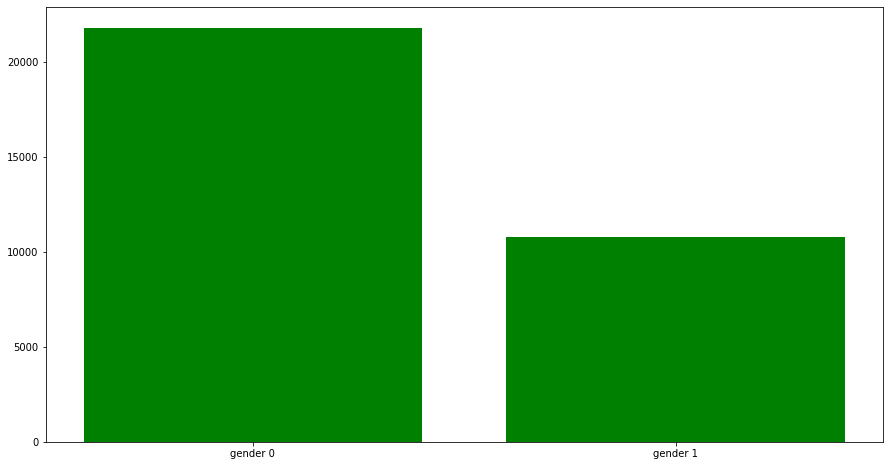

In [ ]:
adult_label_1 = np.sum(df_adult.iloc[: , -1]) 
adult_label_0 = (adult_data_rows - adult_label_1)
adult_class_info  = {'gender 0':adult_label_0, 'gender 1':adult_label_1}
keys, values      = list(adult_class_info.keys()), list(adult_class_info.values())

fig = plt.figure(figsize = (15, 8))
plt.bar(keys, values, color ='green')
plt.show()

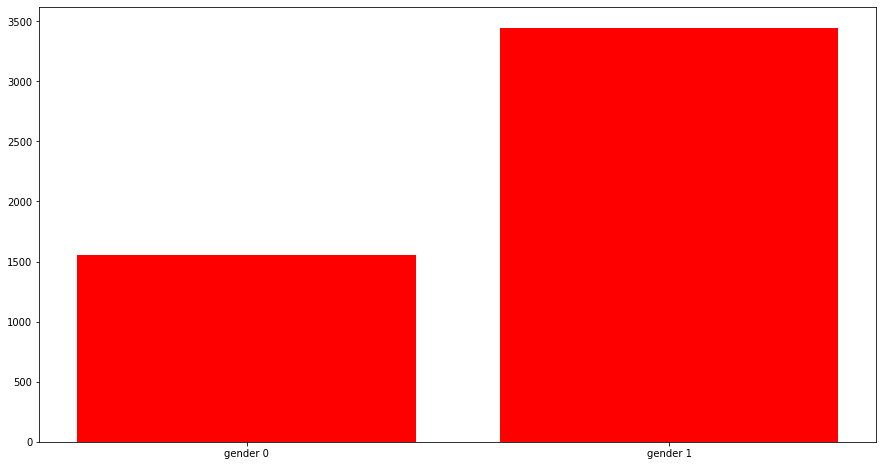

In [ ]:
# Plot a bar chart showing the number of samples for different classes in both dataset (1 point)
# Please insert your code here

spiral_label_1  = np.sum(df_spiral.iloc[: , -1])
spiral_label_0 = (spiral_data_rows - spiral_label_1)
spiral_class_info = {'class 0':spiral_label_0, 'class 1':spiral_label_1}
keys, values      = list(spiral_class_info.keys()), list(spiral_class_info.values())

fig = plt.figure(figsize = (15, 8))
plt.bar(keys, values, color ='red')
plt.show()

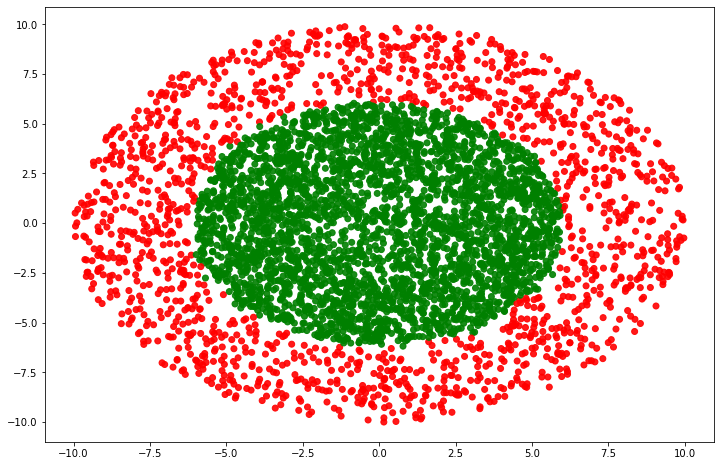

In [ ]:
# Plot a scatter plot for spiral dataset (1 point)
# Please insert your code here
class_colors = []

X_data, Y_data  = df_spiral.iloc[:, 0], df_spiral.iloc[:, 1]
colors  = np.array(df_spiral.iloc[:, 2])

for i in range(0,len(colors)):
    if colors[i] != 0:
      class_colors = class_colors + ['green']
    else:
      class_colors = class_colors + ['red']

fig = plt.figure(figsize = (12, 8))
plt.scatter(X_data, Y_data, c = class_colors, alpha=0.9)
plt.show()

---
**End of Task 1**


---



**TASK 2: DBSCAN**  
                                                     **(6+2+2=10 Marks)**
1. Implement the clustering algorithm DBSCAN on both the datasets. 
2. Compare the two datasets in terms of sum of the squared error and time taken on both datasets. 
3. Plot the obtained clusters for number of cluster ($k$=2).
3. Compare the performance of algorithm on the given datasets with different $k$ values and prepare a detailed observation in the suitable comment box.
4. Which value of K that is best suited based on the sum of squared error metric. Write your general observation and reason for the same. [The answer will be evaluated based on your observations and not any fixed pre-defined value]

**NOTE:<br> 1. Take different $k$ values as 2,5,10,20 and report your obervation.<br> 2. Dont include the sex feature and class label feature in adult and spiral dataset respectively for this task. Thus use 5 features in adult and 2 features in spiral dataset.**


### Implementation of Task 2 on each dataset
##### **(3+3=6 Marks)**

In [ ]:
#computes distance between two instances of data
def euclidean_distance(point1,point2):
    #return np.sqrt(np.sum((np.array(point1)-np.array(point2))**2))
    return np.linalg.norm(np.array(point1)-np.array(point2))

In [ ]:
#does clustering based on density connectedness assigning the cluster value to all neighbours of the core points
def connected_density(points, core_points, cluster_assign, curr_point, cluster, epsilon):
  neighbours = find_nearest_neighbours(points, curr_point, epsilon, cluster_assign)
  
  new_neighbours_list = neighbours
  
  #for each neighbour of a core point
  while True:
    
    if len(new_neighbours_list)<=0:
      break

    new_neighbours_list = []
    for i, point in enumerate(neighbours):
      new_neighbours_list = []
      if cluster_assign[point] != 0:
        continue

      cluster_assign[point] = cluster

      #checking if there is a core point in the neighbourhood of the core point
      find_common = set(find_nearest_neighbours(points, point,epsilon, cluster_assign))&set(core_points)
      if point in core_points or len(list(find_common))>0:
        new_neighbours = find_nearest_neighbours(points, point ,epsilon, cluster_assign)
        new_neighbours_list  = new_neighbours_list + new_neighbours

    neighbours = new_neighbours_list

  return cluster_assign

In [ ]:
#finds all neighbours of the current instance
def find_nearest_neighbours(points, curr_point, epsilon, cluster_assign):
    neigbour_points=[]
    for i, point in enumerate(points):
        if point == curr_point or cluster_assign[point]: 
          continue
        if euclidean_distance(point, curr_point)>epsilon:
          continue
        else:
            neigbour_points.append(point)

    return neigbour_points  #returning the neighbours

In [ ]:
def dbscan(points, epsilon, min_points):

  #Finding core points
  core_points = []
  cluster_assign = {}
  for i, point in enumerate(points):
    cluster_assign[point]=0         #assigning 0 to each data points means that point is not assigned to any cluster and if it is -1 means its a noise point

  for i, point in enumerate(points):
    neighbours = find_nearest_neighbours(points, point,epsilon, cluster_assign)
    if min_points <= len(neighbours):
      core_points= core_points + [point]
  
  #Desnity connected
  cluster = 0
  for i, point in enumerate(core_points):
    if cluster_assign[point]!=0:
      continue
    
    cluster = cluster + 1
    cluster_assign[point] = cluster
    cluster_assign = connected_density(points, core_points, cluster_assign, point, cluster, epsilon)

        
  return cluster, cluster_assign  #returning the total cluster formed and the dictionary which contain the cluster-assign to each dataset


##DBSCAN on Spiral data

In [ ]:
attr1,attr2 = list(df_spiral['x']), list(df_spiral['y'])    # distinguishing the different data points
points=[]
for i in range(0,df_spiral.shape[0],1):
    point_appended = (attr1[i],attr2[i])
    points.append(point_appended)

#running dbscan on spiral dataset
start_time = time.time()
cluster, cluster_assign = dbscan(points,0.25,4)
end_time = time.time()

In [ ]:
cluster_map_dict = {}
ssq_error = 0

for i, point in enumerate(points):
  key  = cluster_assign[point]
  if key not in cluster_map_dict.keys():
    cluster_map_dict[key]=point
  else:
    cluster_map_dict[key] = cluster_map_dict[key] + point

for i in range(0, cluster):
  cluster_mean_vect = np.mean(cluster_map_dict[i+1])
  for j, point in enumerate(cluster_map_dict[i+1]):
    ssq_error = ssq_error +  np.sum((point-cluster_mean_vect)**2)   #finding the square error

print(f" number of clusters : {cluster} \n total_time : {end_time-start_time} seconds \n sum of squared error : {ssq_error}")        

 number of clusters : 342 
 total_time : 570.7603814601898 seconds 
 sum of squared error : 40826.917519802475


In [ ]:
color_codes = {}
class_colors = []

cluster_values = list(cluster_assign.values())
for i, val in enumerate(set(cluster_assign.values())):
  color_codes[val] = (random.random(), random.random(), random.random())       #for better visualization

for i, val in enumerate(cluster_values):
    class_colors+=[color_codes[cluster_values[i]]]

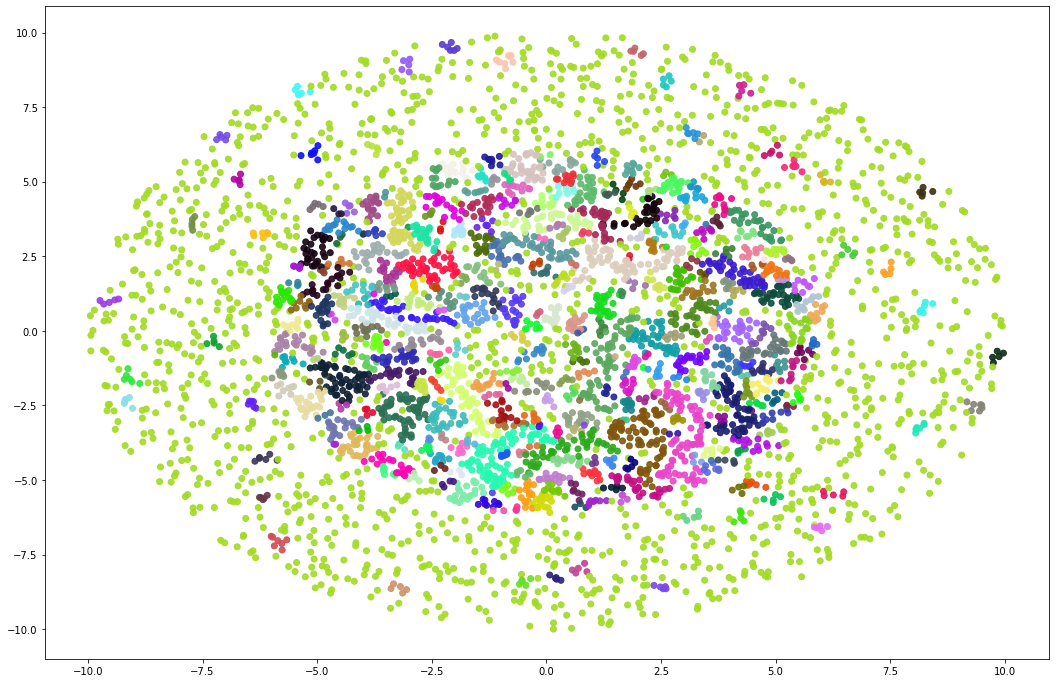

In [ ]:
k, values = list(cluster_assign.keys()), list(cluster_assign.values())
X_data, Y_data =[],[]

for (val_x, val_y) in k:
  X_data, Y_data = X_data + [val_x], Y_data + [val_y]

fig = plt.figure(figsize = (18, 12))
plt.scatter(X_data, Y_data, c = class_colors, alpha=0.9)          # for plot
plt.show()

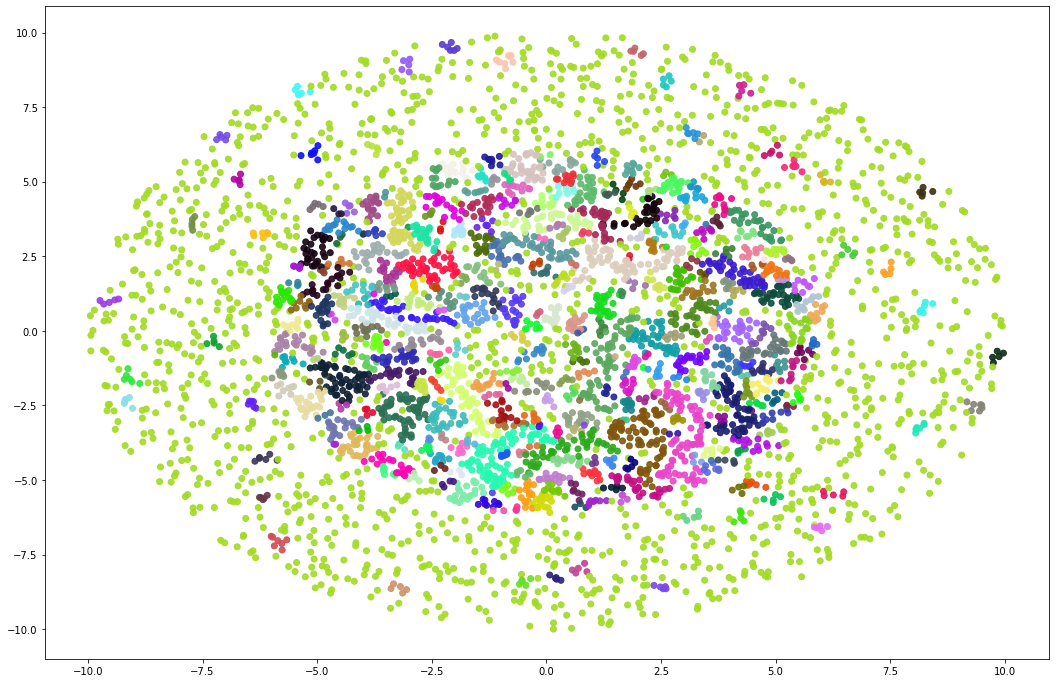

In [ ]:
k, values = list(cluster_assign.keys()), list(cluster_assign.values())
X_data, Y_data =[],[]

for (x, y) in k:
  X_data, Y_data = X_data + [x], Y_data + [y]

fig = plt.figure(figsize = (18, 12))
plt.scatter(X_data, Y_data, c = class_colors, alpha=0.9)
plt.show()

##DBSCAN on Adult dataset

In [ ]:
points = list()
adult_data = (df_adult.to_numpy())[:,:-1]
for i in range(0,df_adult.shape[0],1):
  point_appended = (adult_data[i][0], adult_data[i][1], adult_data[i][2], adult_data[i][3], adult_data[i][4])    # finding all other attributes and appending to list
  points.append(point_appended)

In [ ]:
start_time = time.time()
cluster, cluster_assign = dbscan(points[0:5000],0.5,20)
end_time = time.time()

In [ ]:
cluster_map_dict = {}
ssq_error = 0

for i, point in enumerate(points[0:5000]):
  key  = cluster_assign[point]
  if key not in cluster_map_dict.keys():
    cluster_map_dict[key] = point
  else:
    cluster_map_dict[key] = cluster_map_dict[key] + point

for i in range(0, cluster):
  mean_vect = np.mean(cluster_map_dict[i+1])
  for point in cluster_map_dict[i+1]:
    ssq_error = ssq_error + np.sum((point-mean_vect)**2)

print(f" number of clusters : {cluster} \n total_time : {end_time-start_time} seconds \n sum of squared error : {ssq_error}")

 number of clusters : 26 
 total_time : 698.3121573925018 seconds 
 sum of squared error : 4723.666571759081


In [ ]:
values = list(cluster_assign.values())
color_codes = {}

for i, val in enumerate(set(cluster_assign.values())):
  color_codes[val] = (random.random(), random.random(), random.random())

class_colors = []
for i, val in enumerate(values):
    class_colors= class_colors + [color_codes[values[i]]]

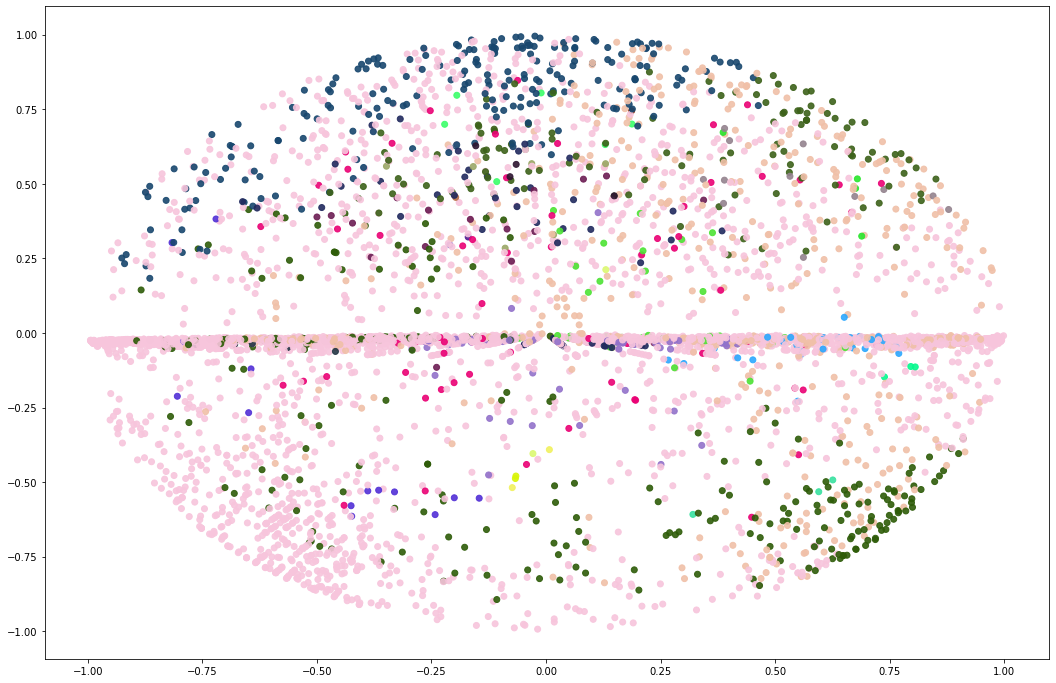

In [ ]:
k, values = list(cluster_assign.keys()), list(cluster_assign.values())
X_data,Y_data = [],[]

for (x, y, c, d, e) in k:
  X_data, Y_data = X_data + [x], Y_data + [y]

fig = plt.figure(figsize = (18, 12))
plt.scatter(X_data, Y_data, c = class_colors, alpha=0.9)
plt.show()

### Plot for Task 2 on both datasets
##### **(1+1=2 Marks)**

### Comments on Task 2          
##### **(2 Marks)**

---

DBSCAN is a density based clustering algorithm, It care about the outliers and noise points 
#For Spiral dataset

From the above plot of spiral dataset we can observe that when epsillion value is 0.25 and min points is 4 we got a number of clusters (342) in total and 

number of clusters : 342 .

total_time : 570.7603814601898 seconds .

sum of squared error : 40826.917519802475

#For adult dataset
when epsllion value is 0.5 and minimum point is 20. we got the following results.

number of clusters : 26 

 total_time : 698.3121573925018 seconds 

 sum of squared error : 4723.666571759081


From the above data we can observe that time required for adult dataset is quite high and this is due to the fact that adult dataset have high dimension as compare to spiral dataset.Sometime it might take more than an hour when epsillion is decreased .


---
**End of Task 2**


---



**TASK 3: EM Algorithm**  
                                                     **(6+2+2=10 Marks)**
1. Implement the EM algorithm with the assumption of Gaussian Mixture model.
2. Take $k$=2 for spiral and $k$=10 for adult dataset.
3. Plot the estimated density functions from your algorithm against the data points generated for both datasets. 
4. Explain the plot in the comment section box for task for both datasets.


### Implementation of Task 3 on each dataset
##### **(3+3=6 Marks)**

In [ ]:
#Implement the EM Algorithm on both datasets   6 points                      
# Please insert your code here
import numpy as np
from scipy.stats import multivariate_normal

# Maxmization-Step: Here mu and sigma are updated fixing phi and weights 
def maximization_step(data):
    global w_val, p_val, mean_val, var_val, clusters
    for i in range(clusters):
       w = w_val[:, [i]]
       mean_val[i] = (data * w).sum(axis=0)
       total_w = w.sum()
       mean_val[i] = mean_val[i] / total_w
       var_val[i] = np.cov(data.T, aweights=(w/total_w).flatten(), bias=True)

#initializing the variables
def set_variables(data):
    dim = data.shape
    
    global clusters, mean_val, var_val, n, m, p_val, w_val
    
    n, m = dim

    mean_val = []
    var_val = []

    for row_index in np.random.randint(low=0, high=n, size=clusters):
      mean_val += [data[row_index,:]]
    
    for _ in range(0, clusters):
      var_val += [np.cov(data.T)]

    p_val = np.full(shape=clusters, fill_value=1/clusters)
    w_val = np.full(shape=dim, fill_value=1/clusters)

# Expectation-Step: This will update weights and phi fixing  mu and sigma 
def expectation_step(data):
    global density_fn, w_val, p_val 
    w_val, density_fn = compute_probability(data)
    p_val = w_val.mean(axis=0)

#finds the cluster assignment for given data
def predict_clusters(data):
    
    global density_fn, w_val
    
    w_val, density_fn = compute_probability(data)

    return np.argmax(w_val, axis=1), density_fn

#computing multivariate normal distribution
def compute_probability(data):
    global density_fn, w_val, p_val, n, clusters , mean_val, var_val
    density_fn = np.zeros( (n, clusters) )

    for i in range(0, clusters):
        multivar_distrib = multivariate_normal(mean=mean_val[i], cov=var_val[i]+0.00001)
        density_fn[:,i] = multivar_distrib.pdf(data)
        
    n_term = density_fn * p_val
    w_val = n_term / n_term.sum(axis=1)[:, np.newaxis]
    return w_val, density_fn

#runs EM-algorithm
def run_em_algo(data):
    global iterations
    set_variables(data)  
    for iteration in range(0,iterations):
        expectation_step(data)
        maximization_step(data)


In [ ]:
#spiral data
np.random.seed(1)
data  = np.array(df_spiral)[:,:-1]
clusters = 2
iterations = 100
run_em_algo(data)

In [ ]:
classes, densityfn = predict_clusters(data)
#print(classes[0:100])

[1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1]


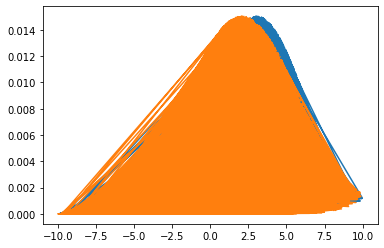

In [ ]:
plt.plot(data[:],densityfn[:,0])      # I have visualized itin 2d , it may be extended to 3d as well

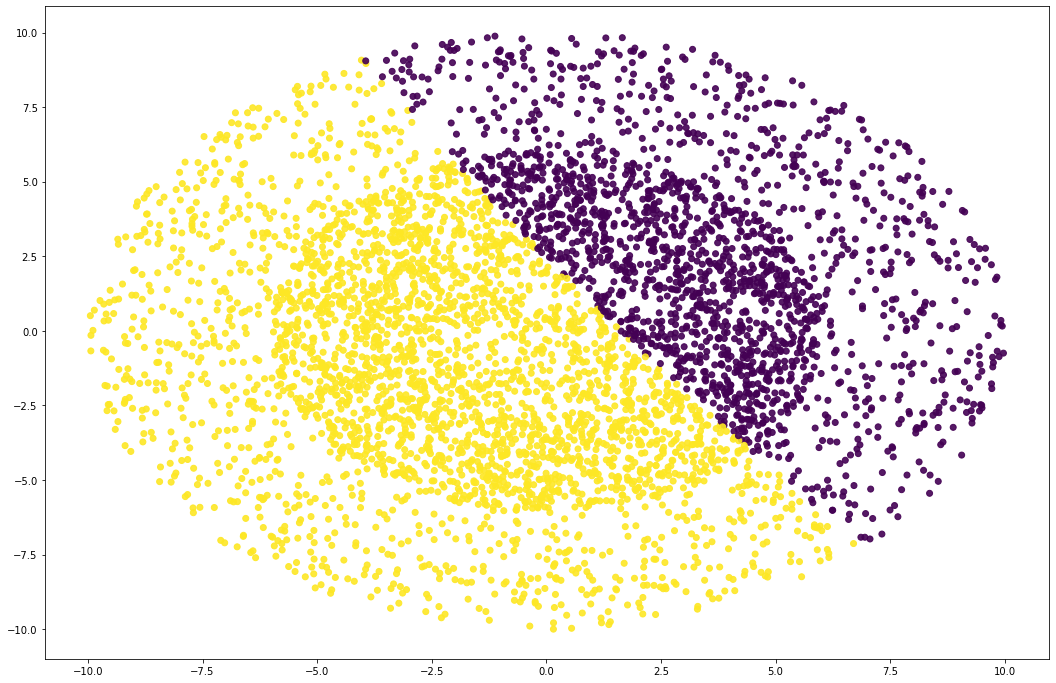

In [ ]:
#Plot for respective k value of both dataset   2 points                      
# Please insert your code here
X_data, Y_data = np.array(df_spiral)[:,0], np.array(df_spiral)[:,1]

fig = plt.figure(figsize = (18, 12))
plt.scatter(X_data, Y_data, c = classes, alpha=0.9)
plt.show()

In [ ]:
#Adult data set data
np.random.seed(1)
data = np.array(df_adult)[:,:-1]
iterations = 100
clusters = 2
run_em_algo(data)

In [ ]:
classes, liklihood = predict_clusters(data)
print(classes[0:100])

[0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0]


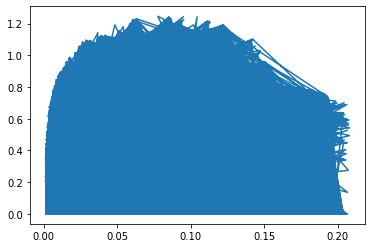

In [ ]:
plt.plot(liklihood[:,0], liklihood[:,1])

### Comments on Task 3          
##### **(2 Marks)**

---

We find the expectation and then maximize its likelihood ratio, it is kind of unsupervised learning and also after each iteration the likelihood increases and when it almost becomes constant we stop our processing. it converges slowly, it requires probablity calculation, it includes some part of statistics.

For spirial dataset plot , it looks like its GMM , its like the data is coming from gaussian distribution.

---
**End of Task 3**


---



## A) **$k$-means Clustering**

$k$-means is very well studied problem in the domain of unsupervised machine learning. It is also sometimes called Vanilla $k$-means or standard $k$-means algorithm. The goal of algorithm is to select $k$ centers and obtain the partioning of the dataset X such that the datapoints are nearest to each center they are assigned. The objective cost of the final clustering obtained is given by 
$$L_p(X, C, \phi) = \left(\sum_{x \in  X }\sum_{j \in [k] } \mathbb{I}(\phi(x) =j)d(x,c_j)^2\right)^\frac{1}{2}
 $$ where $\mathcal{C} = \{C_1, C_2, \ldots, C_k\}$ denotes clusters with centers $C = \{c_j\}_{j=1}^{k}$, $d(.)$ is euclidean distance metric , $\phi$ is cluster assignment and $\mathbb{I}$ is indicator function which helps in checking if datapoint $x$ belongs to $j^{th}$ cluster.<br>
 

It is basically the squared sum of euclidean distance between each point and assigned center. For further details refer **Lecture Notes**

##B)  **Fair $k$-means Clustering**
Machine Learning is being studied in both supervised and unsupervised settings. The decision taken by these algorithms have societal impact on the humans. So if any such decision is biased towards a particular type of people it will lead to catastropic effects on the life of affected individuals. Many such reallife scenarios like automated resume processing of amazon, and US criminal risk prediction etc. have been found to biased towards certain groups of socities like females, or individuals belonging to certain race (black). Thus there is need of fair machine learning algorithms.<br>
In **Supervised** setting, fairness is very well studied problem. In unsupervised setting many new algorithms are coming up to deal with fairness issues and reduce the biasness. <br>
In **Unsupervised** settings like $k$-means clustering the fairness is being studied in two aspects namely:<br><br>
1.**Group Fairness Notion** - deals with the fairness in terms of complete group of points in the cluster. It tries to maintain the ratio of every type of individual within each cluster. eg. If we have 100 datapoints (70 Males + 30 Females) to train upon. Then group fairness tries to capture this ratio within each formed cluster. In simple words,it tries to maintain the ratio of males:females in each cluster to be 70:30 ie 7:3 . <br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To achieve this each center might have to loose some of good points that are intially close to it so as to maintain the ratio. Thus there will be increase in objective cost as compared to vanilla $k$-means clustering.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In order to check whether the obtained clusters are fair or not what one can do is to calculate the value of fairness metric known as **Balance** which can be computed using the given formula:

$$Balance(X,C,\phi) = \min_{j \in \mathcal{C}}\left( 
 \min\left( \frac{\sum_{x \in X:\phi(x)=j}\mathbb{I}{(\rho_i=a)}}{\sum_{x \in X:\phi(x)=j}\mathbb{I}{(\rho_i=b)}}, \frac{\sum_{x \in X:\phi(x)=j}\mathbb{I}{(\rho_i=b)}}{\sum_{x \in X:\phi(x)=j}\mathbb{I}{(\rho_i=a)}} \right)
\right)$$ where $\rho_i$ is the protected attribute of $i^{th}$ data instance and $\rho_i$ can take value $a$ or $b$ in case of binary valued attribute.<br>
<br>
The formula mainly tells us that we need to find the minimum of (a/b , b/a) for each cluster then among these obtained minimas we will report the overall minimum as the balance for complete clustering set obtained.<br><br>
**Takeaway for assignment:** *In our case a and b are two possible values of protected group like male and female.* <br>
*In your assignment so basically you need to find the ratio of male/female or female/male for each cluster, store these in some array and then find the minimum of this array. This final minimum will be the balance. In dataset you can assume male being denoted by 1 and female being denoted by 0*<br><br>

2.**Individual Fairness Notion** -  deals with the fairness with regards to each individual in the space. On similar grounds as balance, one can check the individual fairness in obtained clustering using the metric given by :

$$MaxD(X,C,\phi) = \min_{j \in \mathcal{C}}\left( 
 \min\left( \frac{\max_{x \in X:\phi(x)=j,\ \rho_i=a} d(x,c_j)}{\max_{x \in X:\phi(x)=j,\ \rho_i=b} d(x,c_j)}, \frac{\max_{x \in X:\phi(x)=j,\ \rho_i=b} d(x,c_j)}{\max_{x \in X:\phi(x)=j,\ \rho_i=a} d(x,c_j)} \right)
\right)$$
<br><br>
It basically tries to find the minimum of ( Farthest_male_point_distance /Farthest_female_point_distance ) in each cluster ans then overall metric is minima of these obtained values over k cluster. 

**Takeaway for assignment:**<br> *In your assignment so basically you need to find the minimum of $p=\frac{(farthest\ distance\ of\ male\ point\ in\ cluster)}{(farthest\ distance\ of\ female\ point\ in\ cluster)}$ or $p^{-1}$  for each cluster, store these in some array and then find the minimum of these obtained k sized array. This final minimum will be the maxD.*<br><br>




**TASK 4: Fair $k$-means Clustering**  
                                                     **(19 Marks)**<br><br>
**NOTE:** This task is to be done only on **Adult** dataset.
1. Implement the $k$-means clustering algorithm.
2. While performing $k$-means clustering on adult dataset use only five attributes as feature set: age, fnlwgt, education_num, capital_gain, hours_per_week. 
3. Use the attribute sex as protected (sensitive) attribute for fairness.
4. Calculate the objective cost for different k values. 
4. Calculate the fairness metrics ie. balance and MaxD for set of clusters obtained against different $k$ values. To be more precise, store the value of both metric in a array for different $k$ values. Print these value array obtained
5. Plot the variation of objective cost, balance and maxD over different $k$ values.
6. Comment your observation. Also tell your observation which fairness notion is more beneficial and should be focused upon? Can you think of some other notion of fairness in clustering?


**NOTE: Take different $k$ values as 2,5,10,20 to report your obervation.**

In [ ]:
df_adult.describe()

,age,fnlwgt,education_num,capital_gain,hours_per_week,gender
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,-0.036832,0.010433,-0.038578,-0.009209,-0.058805,0.330795
std,0.540478,0.419612,0.494289,0.497700,0.182528,0.470506
min,-0.998757,-0.997349,-0.995309,-0.998461,-0.929529,0.000000
25%,-0.500943,-0.074303,-0.409347,-0.340174,-0.114820,0.000000
50%,-0.074180,-0.023141,-0.066467,-0.032639,-0.083238,0.000000
75%,0.421290,0.226476,0.298900,0.433048,-0.058380,1.000000
max,0.998486,0.998065,0.999251,0.997413,0.997894,1.000000


In [ ]:
#Implement the kmeans algorithm        10 points 
# Please insert your code here

def k_means(k, iterations):
  
  global centres, data, cluster_map_dict
  prev_cluster_assign = []
  
  for _ in range(0,iterations,1):
    cluster_map_dict = {}
    cluster_assignment = find_nearest_cluster(centres, data[:,:-1], n_instances, k)
    
    for i in range(0,k,1):
      cluster_map_dict[i+1] = np.array([]).reshape(n_attributes,0)

    for i in range(0,n_instances,1):
      cluster_map_dict[cluster_assignment[i]] = np.c_[cluster_map_dict[cluster_assignment[i]], data[i]]

    for i in range(0,k,1):
      cluster_map_dict[i+1] = cluster_map_dict[i+1].T
    
    for i in range(0,k,1):
      centres[i,:] = np.mean(cluster_map_dict[i+1][:,:-1],axis = 0)

    if len(prev_cluster_assign) == 0:
      continue
    
    if np.sum(abs(cluster_assignment-prev_cluster_assign)) < 100:
      print("kmeans converged")
      break

    prev_cluster_assign = cluster_assignment


def find_nearest_cluster(centres, data, n, k):
  euclidean_distance = np.array([]).reshape(n,0)

  for i in range(0,k,1):
    distance = np.sum((data-centres[i,:])**2, axis = 1)
    euclidean_distance = np.c_[euclidean_distance, distance]

  return np.argmin(euclidean_distance, axis = 1)+1   


In [ ]:
#Calculate the fairness metrics and print       5 points for calculation of all three metrics and  1 point for printing
# Please insert your code

#metric: within_cluster_dist

def within_cluster_dist():        #for find square distance
  within_cluser_dist = 0

  for i in range(0,k,1):
    for inst in cluster_map_dict[i+1]:
      within_cluser_dist = within_cluser_dist + np.sqrt(np.sum((inst[:-1] - centres[i,:])**2))

  print(f"within cluster distance : {within_cluser_dist}")
  
  return within_cluser_dist

def get_maxd():
  
  global_min = sys.maxsize

  for i in range(0,k,1):
    
    local_min = sys.maxsize
    max_male_dist = 0
    max_female_dist = 0

    for j, point in enumerate(cluster_map_dict[i+1]):
      if not point[5]:
        max_female_dist = max(max_female_dist,np.sqrt(np.sum((point[:-1]-centres[i,:])**2)))
      else:
        max_male_dist = max(max_male_dist,np.sqrt(np.sum((point[:-1]-centres[i,:])**2)))

    local_min = min(max_female_dist/max_male_dist, max_male_dist/max_female_dist)
    global_min = min(local_min,global_min)

  print(f"MaxD : {global_min}")

  return global_min

def get_balance():
  
  global_min = sys.maxsize
  
  for i in range(k):
    
    x = 0
    y = 0
    local_min = sys.maxsize

    for j, point in enumerate(cluster_map_dict[i+1]):
      if not point[5]:
        y=y+1
      else:
        x=x+1

    local_min = min((y/x),(x/y))
    global_min = min(local_min,global_min)

  balance = global_min
  print(f"Balance : {balance}")

  return balance

In [ ]:
k_values = [2,5,10,20]
n_instances, n_attributes = len(df_adult.index), len(df_adult.columns)
data = np.array(df_adult)

no_iterations = 1

balance = []
maxd = []
wcluster_dist = []

for i, k in enumerate(k_values):
  print(f"############## k = {k} ##############")           #printing the square distance and printing it
  cluster_map_dict = {}
  rand_indices = np.random.randint(0,n_instances,k)
  centres = np.array(df_adult.iloc[rand_indices,:-1])
  k_means(k,no_iterations)
  wcluster_dist = wcluster_dist + [within_cluster_dist()]
  balance = balance + [get_balance()]
  maxd = maxd + [get_maxd()]
  

############## k = 2 ##############
within cluster distance : 29500.92646794964
Balance : 0.3714112414071977
MaxD : 0.9847634542660719
############## k = 5 ##############
within cluster distance : 24261.208407224076
Balance : 0.3233794610342316
MaxD : 0.9406827153914397
############## k = 10 ##############
within cluster distance : 19116.427426936836
Balance : 0.2866948257655755
MaxD : 0.8952323341777408
############## k = 20 ##############
within cluster distance : 15016.89885280434
Balance : 0.18350898946063235
MaxD : 0.7925523524290387


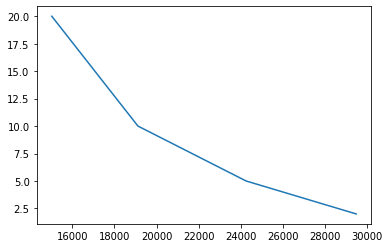

In [ ]:
## Plot the variation over different k values     3 points 
# Please insert your code
plt.plot(wcluster_dist, k_values) #plot of cluster distance with respect to k_values

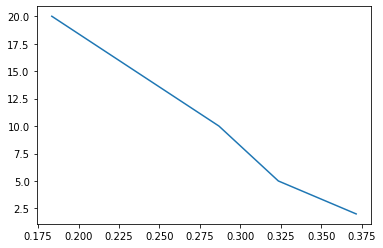

In [ ]:
plt.plot(balance, k_values)   # plot of balance vs k_values

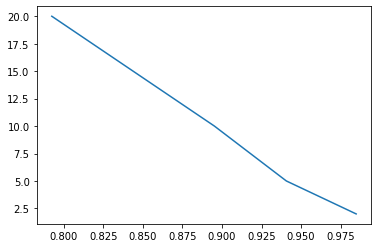

In [ ]:
plt.plot(maxd, k_values)   #plot of maxd vs k_values

### Comments on Task 4          
##### **( Marks)**

---

 we are assign each data point to its nearest center to form clusters and chosing fair centres so that maximum average across diffrent groups is minimized, It is more convergence as compare to k-means clustering , it converges faster .

From the above graph we can conclude that as the number of clusters increases the cost is decreasing. For values less than 5 the balance decreases with value k but after that it increases. MaxD is reciprocal to k_values as it increases when k_values is less and vice versa 

 There is another method like  Lloyd’s algorithm or elbow method but this method  better than others

---
**End of Task 4**


---



**TASK 5: Observation**
**(0.5 + 0.5 =1 Marks)**   
 
#### Which out of $k$-means and DBSCAN algorithm do you think is best suited for the given datasets ?

K-means algorithm is easy to implement but it does not work with outliers and converges slowly when the attributes are large.

DBSCAN - It works for noisy data and outliers,here cluster can be of any shape unlike k-means where are more/less spiral.But it is highly sensitive to epsilion and minimum points parameters. Our adult dataset sometimes takes a lot of time if the value of epsillion and min points are taken randomly.

In the given adult dataset dbscan takes more time then K-means as we have to adjust our parameters (epsillion and min points ).


---
**End of Task 5**


---

